##데이터 로드

In [195]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import pandas
import sklearn
import statsmodels

print(pandas.__version__)
print(sklearn.__version__)
print(statsmodels.__version__)

1.5.3
1.2.2
0.13.5


In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

dataset_filepath1 = '/content/drive/MyDrive/Colab Notebooks/aiffel/data/AAPL.csv'
dataset_filepath2 = '/content/drive/MyDrive/Colab Notebooks/aiffel/data/TSLA.csv'
dataset_filepath3 = '/content/drive/MyDrive/Colab Notebooks/aiffel/data/AMZN.csv'

df1 = pd.read_csv(dataset_filepath1, index_col='Date', parse_dates=True)
ts_AAPL = df1['Close']
df2 = pd.read_csv(dataset_filepath2, index_col='Date', parse_dates=True)
ts_TSLA = df2['Close']
df3 = pd.read_csv(dataset_filepath3, index_col='Date', parse_dates=True)
ts_AMZN = df3['Close']

이번 노트북에서 볼 주식은 애플, 테슬라, 아마존이다!

In [199]:
print(ts_AAPL.head())
print(ts_TSLA.head())
print(ts_AMZN.head())

Date
2022-04-21    166.419998
2022-04-22    161.789993
2022-04-25    162.880005
2022-04-26    156.800003
2022-04-27    156.570007
Name: Close, dtype: float64
Date
2022-04-21    336.260010
2022-04-22    335.016663
2022-04-25    332.673340
2022-04-26    292.140015
2022-04-27    293.836670
Name: Close, dtype: float64
Date
2022-04-21    148.296005
2022-04-22    144.350006
2022-04-25    146.074005
2022-04-26    139.391006
2022-04-27    138.167007
Name: Close, dtype: float64


##전처리

###결측치 확인

<Axes: xlabel='Date'>

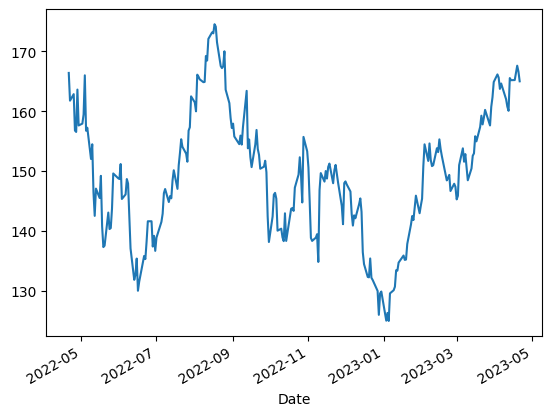

In [200]:
ts_AAPL = ts_AAPL.interpolate(method='time')
ts_AAPL[ts_AAPL.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_AAPL.plot()

<Axes: xlabel='Date'>

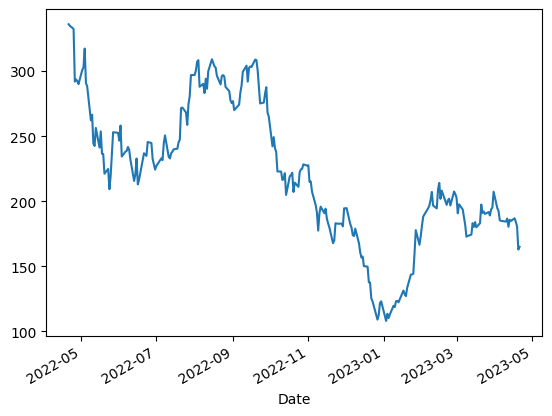

In [201]:
ts_TSLA = ts_TSLA.interpolate(method='time')
ts_TSLA[ts_TSLA.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_TSLA.plot()

<Axes: xlabel='Date'>

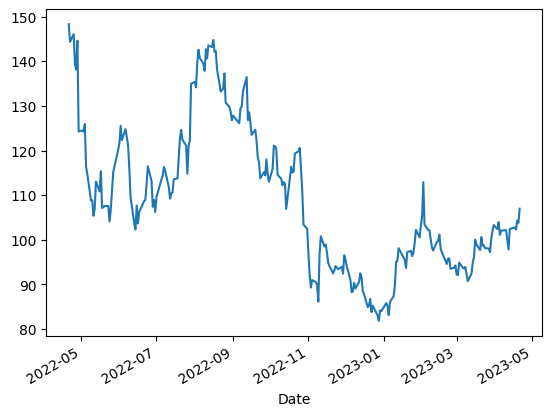

In [202]:
ts_AMZN = ts_AMZN.interpolate(method='time')
ts_AMZN[ts_AMZN.isna()]  # Time Series에서 결측치가 있는 부분만 Series로 출력합니다.
ts_AMZN.plot()

###로그 변환

<Axes: xlabel='Date'>

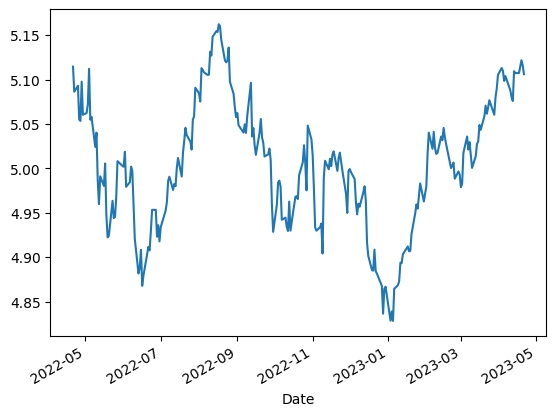

In [203]:
# 로그 변환
ts_AAPL_log = np.log(ts_AAPL)
ts_AAPL_log.plot()

<Axes: xlabel='Date'>

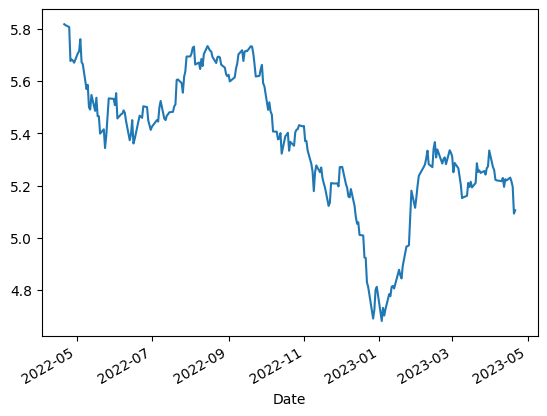

In [204]:
# 로그 변환
ts_TSLA_log = np.log(ts_TSLA)
ts_TSLA_log.plot()

<Axes: xlabel='Date'>

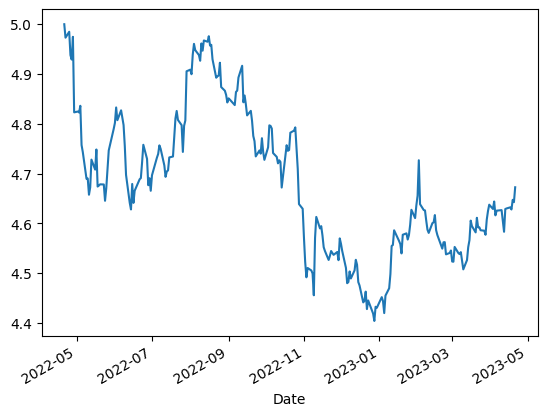

In [205]:
# 로그 변환
ts_AMZN_log = np.log(ts_AMZN)
ts_AMZN_log.plot()

##정상성 분석

In [206]:
from statsmodels.tsa.stattools import adfuller

def augmented_dickey_fuller_test(timeseries):
    # statsmodels 패키지에서 제공하는 adfuller 메서드를 호출합니다.
    dftest = adfuller(timeseries, autolag='AIC')  
    
    # adfuller 메서드가 리턴한 결과를 정리하여 출력합니다.
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [207]:
def plot_rolling_statistics(timeseries, window=12):
    
    rolmean = timeseries.rolling(window=window).mean()  # 이동평균 시계열
    rolstd = timeseries.rolling(window=window).std()    # 이동표준편차 시계열

     # 원본시계열, 이동평균, 이동표준편차를 plot으로 시각화해 본다.
    orig = plt.plot(timeseries, color='blue',label='Original')    
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

###애플

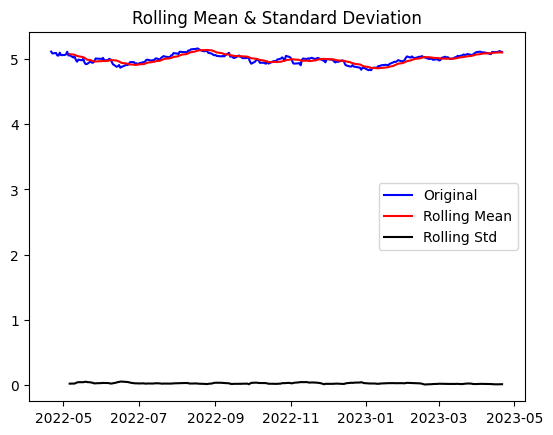

Results of Dickey-Fuller Test:
Test Statistic                  -2.451080
p-value                          0.127835
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


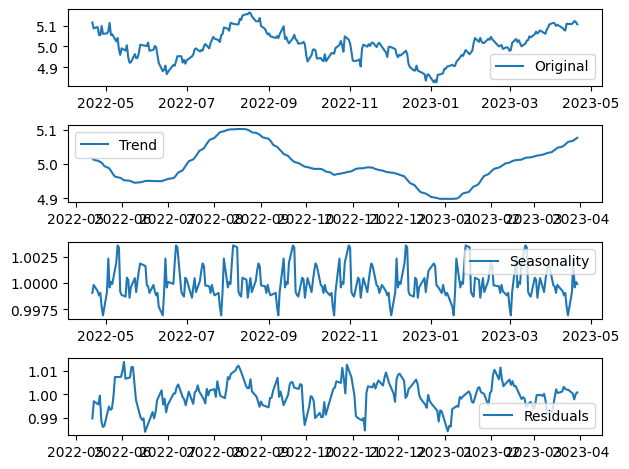

In [208]:
# 정성적 그래프 분석_애플
plot_rolling_statistics(ts_AAPL_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_AAPL_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_AAPL_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_AAPL_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [209]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -5.260381
p-value                          0.000007
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


Augmented Dickey-Fuller Test의 결과를 보면, p value가 0.127835 로 충분히 낮지 않다. 즉 귀무가설을 기각하기엔 불충분하고, 안정적이라고 할 수 없다. 여기서 시계열 분해를 거쳐 residuals의 p-value는 충분히 낮아 안정적인 걸 확인할 수 있다. 이는 다른 두 주식도 마찬가지다.

###테슬라

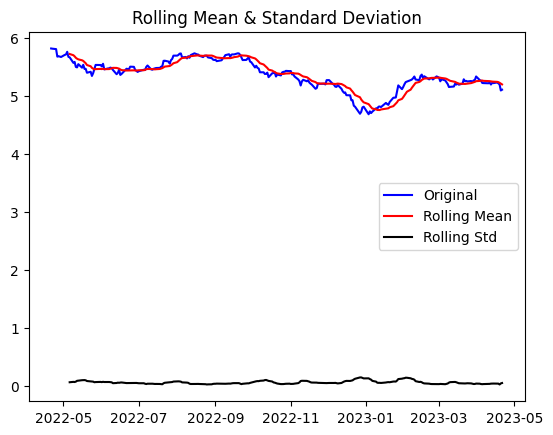

Results of Dickey-Fuller Test:
Test Statistic                  -2.186009
p-value                          0.211363
#Lags Used                       9.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


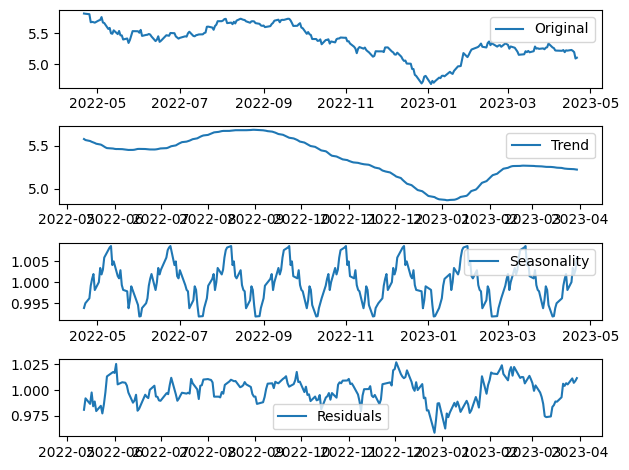

In [210]:
# 정성적 그래프 분석_테슬라

plot_rolling_statistics(ts_TSLA_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_TSLA_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_TSLA_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_TSLA_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [211]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                  -4.763605
p-value                          0.000064
#Lags Used                       0.000000
Number of Observations Used    221.000000
Critical Value (1%)             -3.460291
Critical Value (5%)             -2.874709
Critical Value (10%)            -2.573789
dtype: float64


###아마존

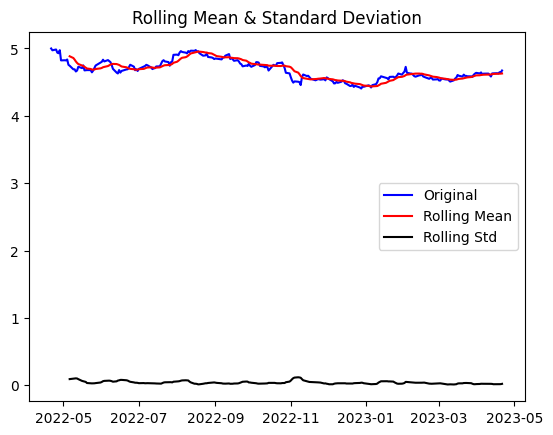

Results of Dickey-Fuller Test:
Test Statistic                  -2.424775
p-value                          0.134865
#Lags Used                       0.000000
Number of Observations Used    251.000000
Critical Value (1%)             -3.456674
Critical Value (5%)             -2.873125
Critical Value (10%)            -2.572944
dtype: float64


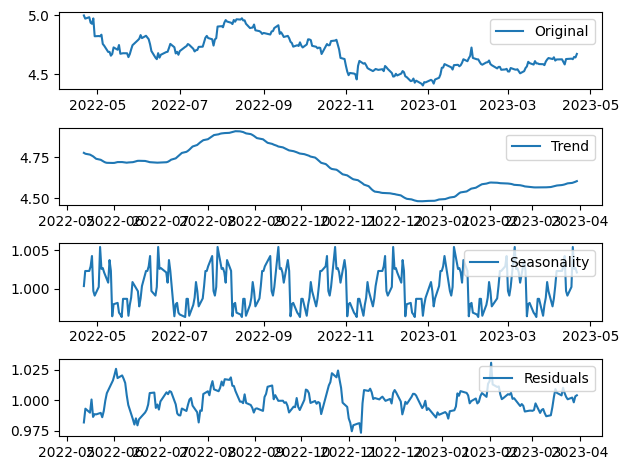

In [212]:
# 정성적 그래프 분석_아마존

plot_rolling_statistics(ts_AMZN_log, window=12)

#정량적 Augmented Dicky-Fuller Test
augmented_dickey_fuller_test(ts_AMZN_log)

#시계열 분해 (Time Series Decomposition)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_AMZN_log, model='multiplicative', period = 30) 
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_AMZN_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [213]:
# Residual 안정성 확인
residual.dropna(inplace=True)
augmented_dickey_fuller_test(residual)

Results of Dickey-Fuller Test:
Test Statistic                -5.733752e+00
p-value                        6.509793e-07
#Lags Used                     3.000000e+00
Number of Observations Used    2.180000e+02
Critical Value (1%)           -3.460708e+00
Critical Value (5%)           -2.874891e+00
Critical Value (10%)          -2.573886e+00
dtype: float64


/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


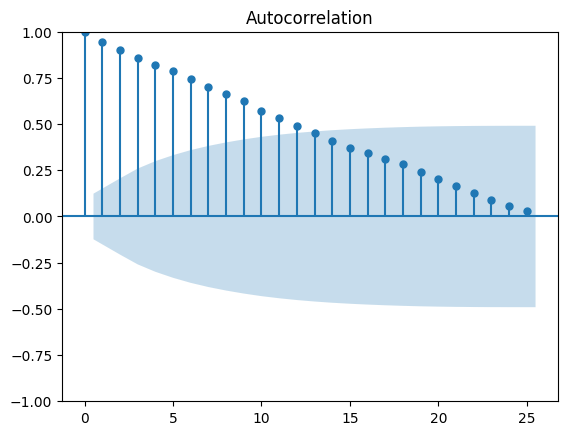

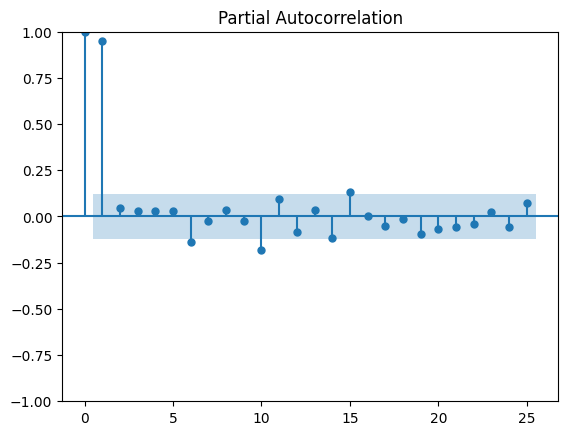

In [214]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_AAPL_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_AAPL_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.680041e+01
p-value                        1.221579e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


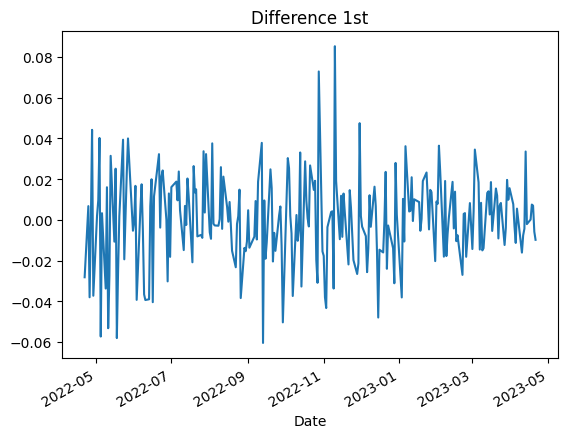

In [215]:
# 차분 안정성 확인 -> d 구하기
# [[YOUR CODE]]
diff_1 = ts_AAPL_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(diff_1)

##train test 셋 분리

###애플

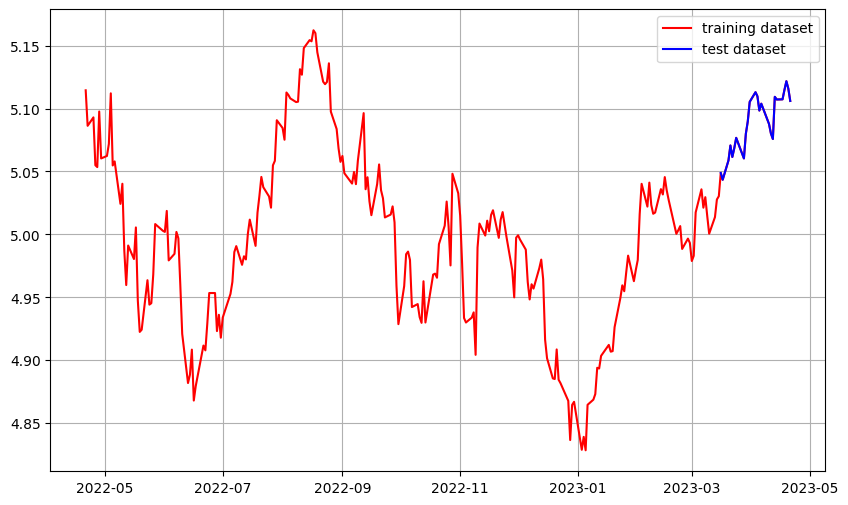

In [216]:

train_data, test_data = ts_AAPL_log[:int(len(ts_AAPL_log)*0.9)], ts_AAPL_log[int(len(ts_AAPL_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_AAPL_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_AAPL_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

In [217]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 538.406
Date:                Sat, 22 Apr 2023   AIC                          -1070.812
Time:                        08:15:45   BIC                          -1060.550
Sample:                             0   HQIC                         -1066.671
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0064      0.025    201.338      0.000       4.958       5.055
ar.L1          0.9495      0.021     45.780      0.000       0.909       0.990
sigma2         0.0005   4.08e-05     12.115      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


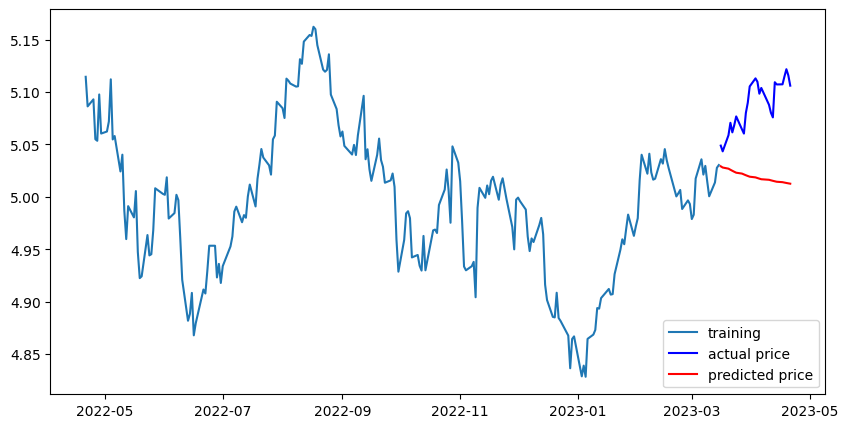

In [218]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


In [219]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  134.51129033765264
MAE:  10.761321551137359
RMSE:  11.597900255548529
MAPE: 6.58%


autoarima를 쓴다면?

In [220]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=6.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-846.205, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-904.625, Time=1.05 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-846.483, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-941.152, Time=5.62 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=-969.338, Time=19.35 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.77 sec
 ARIMA(1,1,0)(2,1,2)[12]             : AIC=-967.694, Time=5.04 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=6.46 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=-970.589, Time=4.15 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-942.067, Time=0.84 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=-968.938, Time=3.56 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


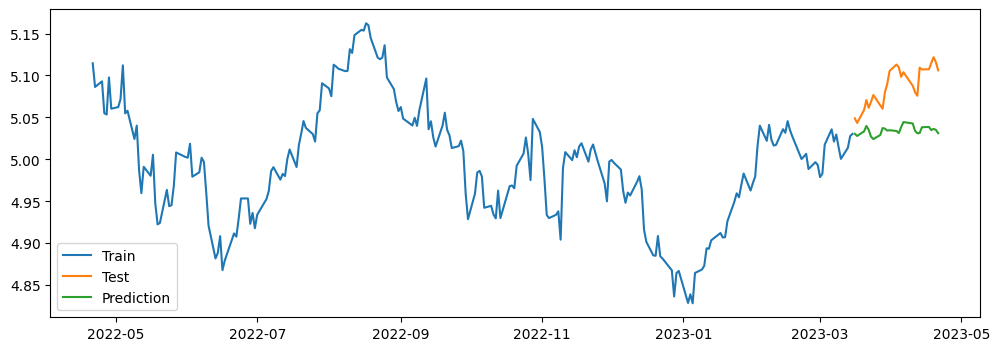

In [221]:
# 예측
fc = model.predict(n_periods=len(test_data))
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(fc_series, label='Prediction')
plt.legend()
plt.show()

In [222]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  83.7177715063266
MAE:  8.459445118265815
RMSE:  9.149741608719156
MAPE: 5.17%


그래프 상으로도, 수치 상으로도 조금 나아진 듯하다.

###테슬라

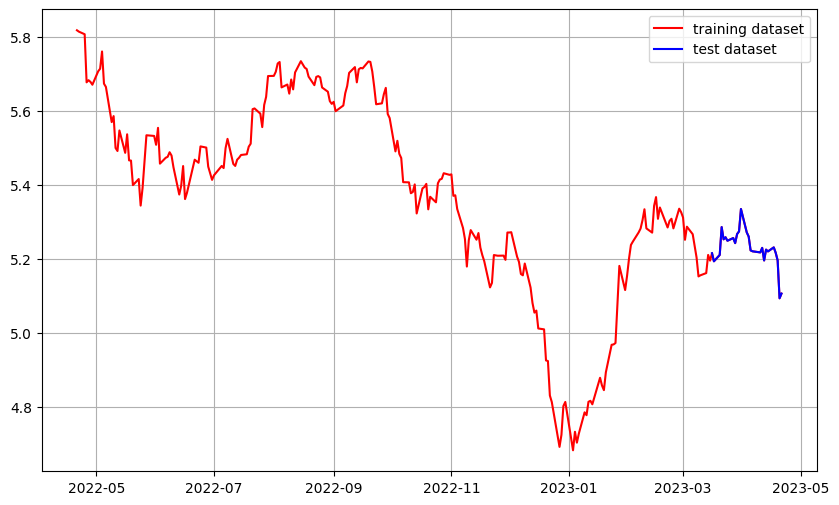

In [223]:

train_data, test_data = ts_TSLA_log[:int(len(ts_TSLA_log)*0.9)], ts_TSLA_log[int(len(ts_TSLA_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_TSLA_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_TSLA_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


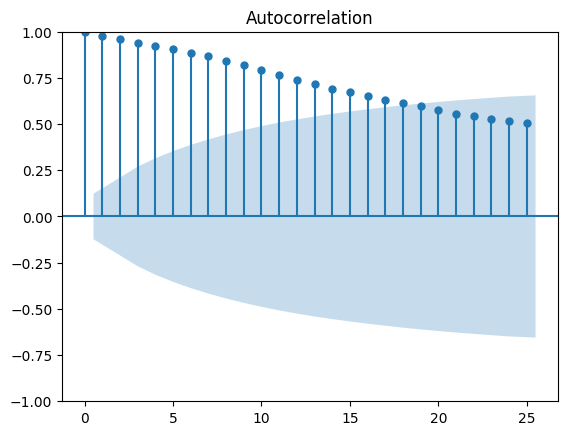

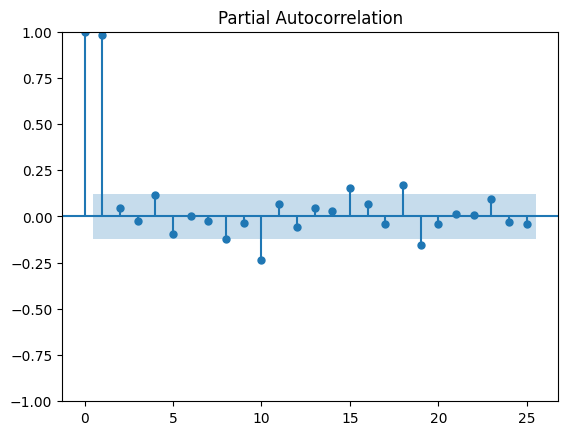

In [224]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(ts_TSLA_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_TSLA_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                  -3.406483
p-value                          0.010740
#Lags Used                       8.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


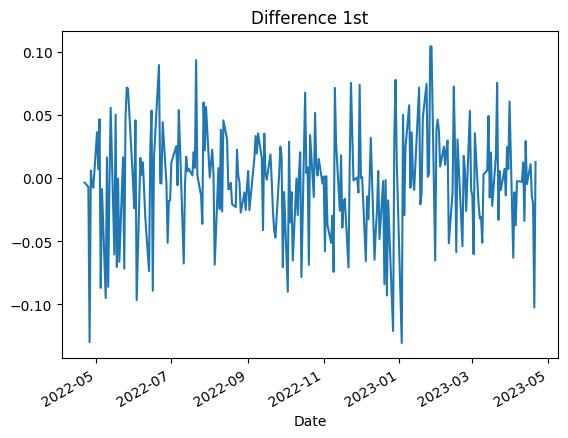

In [225]:
# 차분 안정성 확인 -> d 구하기
diff_1 = ts_TSLA_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(diff_1)

In [226]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 388.409
Date:                Sat, 22 Apr 2023   AIC                           -770.818
Time:                        08:17:13   BIC                           -760.557
Sample:                             0   HQIC                          -766.677
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4357      0.166     32.769      0.000       5.111       5.761
ar.L1          0.9886      0.009    114.946      0.000       0.972       1.005
sigma2         0.0019      0.000     11.373      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


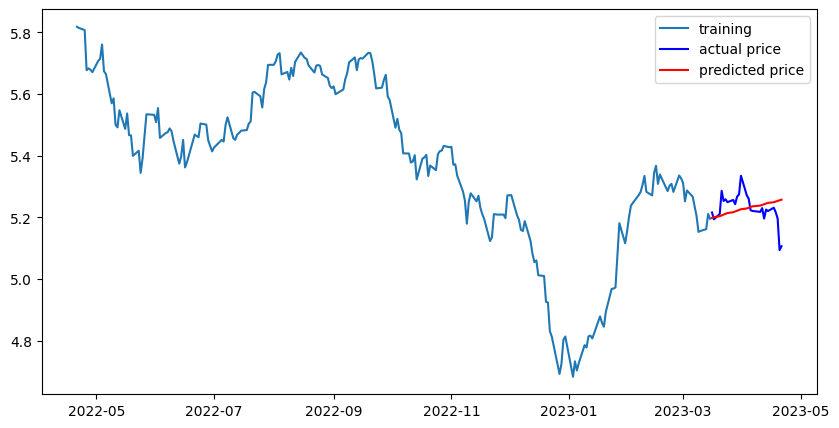

In [227]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


In [228]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  118.50546063426913
MAE:  8.218645564992853
RMSE:  10.886021340888007
MAPE: 4.48%


autoarima를 쓴다면?

In [229]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-578.119, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-643.432, Time=0.40 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.89 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-579.696, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-665.676, Time=1.59 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.06 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.02 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-666.898, Time=0.77 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-644.096, Time=0.23 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=3.88 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-665.519, Time=2.24 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-665.964, Time=3.19 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-665.2

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


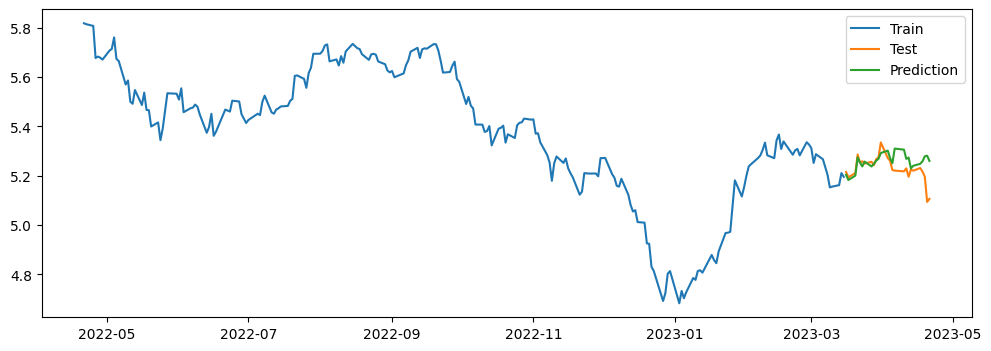

In [230]:
# 예측
fc = model.predict(n_periods=len(test_data))
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(fc_series, label='Prediction')
plt.legend()
plt.show()

In [231]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  125.19976181725238
MAE:  7.354771747096297
RMSE:  11.189269941209407
MAPE: 4.11%


테슬라 역시 그래프와 수치 상으로 나아진 모습.

###아마존

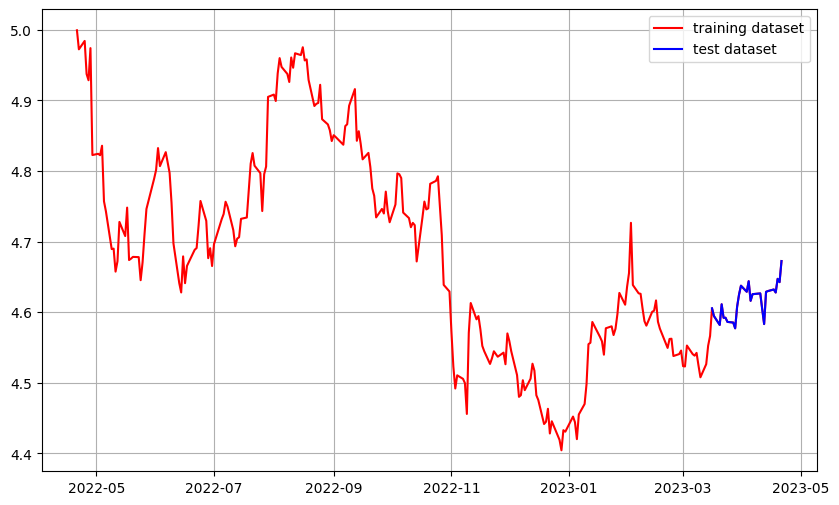

In [232]:

train_data, test_data = ts_AMZN_log[:int(len(ts_AMZN_log)*0.9)], ts_AMZN_log[int(len(ts_AMZN_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.plot(ts_AMZN_log, c='r', label='training dataset')  # train_data를 적용하면 그래프가 끊어져 보이므로 자연스러운 연출을 위해 ts_AMZN_log를 선택
plt.plot(test_data, c='b', label='test dataset')
plt.legend()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


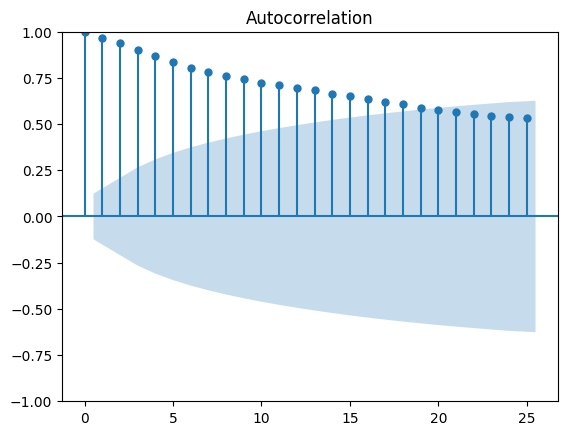

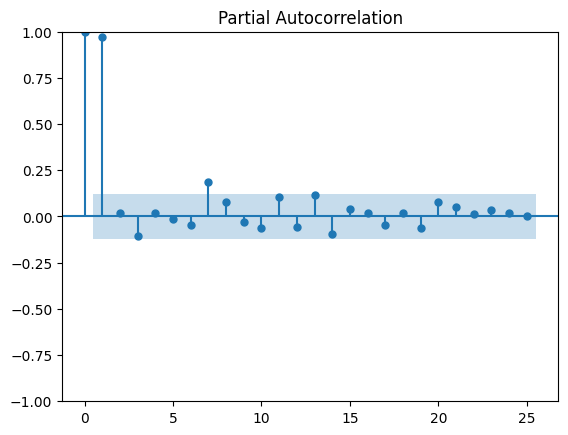

In [233]:
# ACF, PACF 그려보기 -> p,q 구하기
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(ts_AMZN_log)   # ACF : Autocorrelation 그래프 그리기
plot_pacf(ts_AMZN_log)  # PACF : Partial Autocorrelation 그래프 그리기
plt.show()

Results of Dickey-Fuller Test:
Test Statistic                -1.587070e+01
p-value                        8.988809e-29
#Lags Used                     0.000000e+00
Number of Observations Used    2.500000e+02
Critical Value (1%)           -3.456781e+00
Critical Value (5%)           -2.873172e+00
Critical Value (10%)          -2.572969e+00
dtype: float64


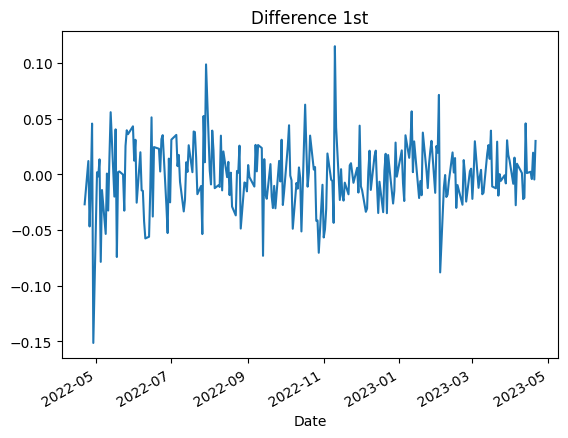

In [234]:
# 차분 안정성 확인 -> d 구하기
diff_1 = ts_AMZN_log.diff(periods=1).iloc[1:]
diff_1.plot(title='Difference 1st')
augmented_dickey_fuller_test(diff_1)

In [235]:
from statsmodels.tsa.arima.model import ARIMA

# Build and Train  Model
model = ARIMA(train_data, order=(1, 0, 0))  
fitted_m = model.fit() 

print(fitted_m.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  226
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 461.846
Date:                Sat, 22 Apr 2023   AIC                           -917.693
Time:                        08:17:43   BIC                           -907.431
Sample:                             0   HQIC                          -913.552
                                - 226                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7202      0.089     53.281      0.000       4.547       4.894
ar.L1          0.9831      0.014     72.743      0.000       0.957       1.010
sigma2         0.0010   6.73e-05     14.373      0.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


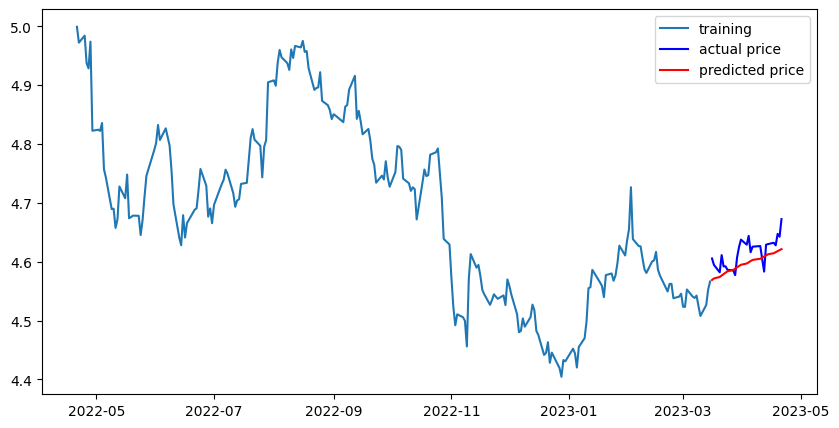

In [236]:
# Forecast : 결과가 fc에 담깁니다. 
fc = fitted_m.forecast(len(test_data), alpha=0.05)  # 95% conf
fc = np.array(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_data.index)   # 예측결과
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, c='b', label='actual price')
plt.plot(fc_series, c='r',label='predicted price')
plt.legend()
plt.show()


In [237]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  6.557777372101851
MAE:  2.1884722597945885
RMSE:  2.5608157630141712
MAPE: 2.14%


autoarima를 쓴다면?

In [238]:
from pmdarima.arima import auto_arima
model = auto_arima(train_data, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True,
                   stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.37 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-713.970, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-767.258, Time=0.52 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.24 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-714.373, Time=0.15 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-794.671, Time=2.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=7.03 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-796.668, Time=1.09 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-769.117, Time=0.33 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=4.49 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.45 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=-794.670, Time=2.31 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=-793.418, Time=2.48 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=-795.0

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


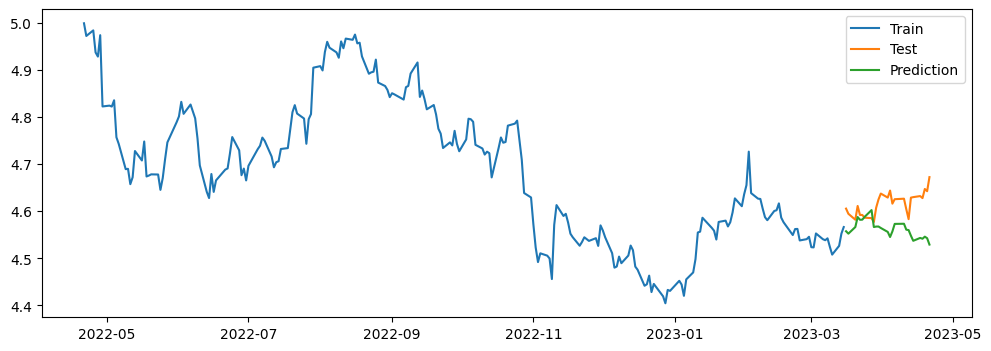

In [239]:
# 예측
fc = model.predict(n_periods=len(test_data))
fc = np.array(fc)
fc_series = pd.Series(fc, index=test_data.index)

# 그래프
fig, axes = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(fc_series, label='Prediction')
plt.legend()
plt.show()

In [240]:
mse = mean_squared_error(np.exp(test_data), np.exp(fc))
print('MSE: ', mse)

mae = mean_absolute_error(np.exp(test_data), np.exp(fc))
print('MAE: ', mae)

rmse = math.sqrt(mean_squared_error(np.exp(test_data), np.exp(fc)))
print('RMSE: ', rmse)

mape = np.mean(np.abs(np.exp(fc) - np.exp(test_data))/np.abs(np.exp(test_data)))
print('MAPE: {:.2f}%'.format(mape*100))

MSE:  42.630566597553376
MAE:  5.486225599551178
RMSE:  6.529208726756511
MAPE: 5.35%


아마존은 수치 상으로는 살짝 성능이 저하된 모습.